In [15]:
import pandas as pd
import os
api_key = os.getenv("OPENAI_API_KEY", "")

In [12]:
x = '/data/ch52669/gene_interaction/tot-gene-sets/src/tot/data/gene_sets/x_eval.txt'
y = '/data/ch52669/gene_interaction/tot-gene-sets/src/tot/data/gene_sets/y_eval.txt'

x_data = [pt.strip() for pt in open(x).readlines()]
y_data = [pt.strip() for pt in open(y).readlines()]

In [38]:
len(x_data)

1000

In [14]:
y_data[0]

'positive regulation of intracellular cholesterol transport'

In [97]:
import openai
from tqdm import tqdm_notebook

# responses = []
for i in tqdm_notebook(range(28,100)):
    # Replace "your_api_key_here" with your actual OpenAI API key
    openai.api_key = api_key

    # System prompt that sets the context or instructions for the AI
    system_prompt = '''Introduction: You will be given a list of genes and a name of a biological process. Your task is to evaluate how specific the given biological process name is to the provided set of genes.

Input Data: The input will consist of a list of gene names, formatted as a comma-separated list, followed by the name of a biological process. For example: "Gene1, Gene2, Gene3; Cell Division".

Task Description: Based on the provided genes and biological process name, you are to determine the specificity of the biological process to these genes on a scale from 1 to 10. A score of 1 means the biological process name is very general and not closely related to the genes, while a score of 10 means the biological process name is highly specific and closely related to the genes.

Criteria for Evaluation: Consider the following when determining the specificity score:
- The relevance of the biological process to the functions of the provided genes.
- The uniqueness of the process to these genes.
- Any known associations between the genes and the biological process, based on scientific literature up to your last training cut-off.

Please answer strictly in the following JSON format:
{'Score': 1~10, 'Reason': Your Reason} '''
    
#     "Evaluate the specificity of the biological process name to the given genes on a scale from 1 to 10. Respond to questions in JSON format, following this template: {'Score': 1~10, 'Reason': Your Reason} "

    # User prompt with the actual question or task
    user_prompt = f"{x_data[i]}; {y_data[i]}, Evaluate the specificity of the biological process name on a scale from 1 to 10."

    messages = [{"role": "system", "content": system_prompt}, {"role": "user", "content": user_prompt}]
    # Combining both prompts

    response = openai.ChatCompletion.create(
      model="gpt-3.5-turbo-1106",  # Specify the model you're using; adjust if the model name changes
      messages=messages,
      temperature=0.7,
      response_format={'type': 'json_object'}
    )

    content = json.loads(response.choices[0].message.content)
    responses.append(content)


/tmp/ipykernel_1759760/3387174388.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(28,100)):


  0%|          | 0/72 [00:00<?, ?it/s]

In [100]:
scores = []
for r in responses:
    if 'Score' not in r:
        print(r)
    else:
        scores.append(r['Score'])
len(scores)

100

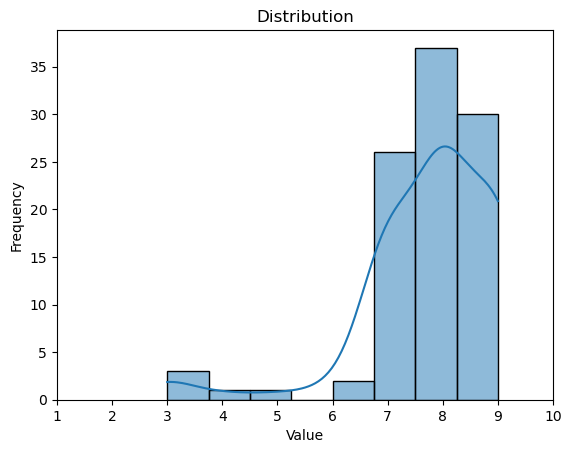

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate a random dataset with a normal distribution
# data = np.random.normal(loc=0, scale=1, size=1000)  # loc is the mean, scale is the standard deviation

# Use seaborn to create a histogram and a kernel density estimate (KDE) plot
sns.histplot(scores, kde=True)

# Adding titles and labels for clarity
plt.title('Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 11, 1))

# Show the plot
plt.show()


In [69]:
max(scores)

10

In [87]:
gene_responses = []
for i in range(100):
    content = '''How specific do you think the name should be? On a scale from 1 to 10. 1 being generic, and 10 being specific. 
    Respond to questions in JSON format, following this template: {'Score': '1~10', 'Reason': Your Reason}'''
    user_prompt = f"Genes: {x_data[i]}"
    response = openai.ChatCompletion.create(
          model="gpt-3.5-turbo-1106",  # Specify the model you're using; adjust if the model name changes
          messages=[{"role": "system", "content": content}, {"role": "user", "content": user_prompt}],
          temperature=0.7,
          response_format={'type': 'json_object'}
        )
    gene_responses.append(response)

In [88]:
gene_scores = []
for r in gene_responses:
    r = json.loads(r.choices[0].message.content)
    if 'Score' not in r:
        print(r)
    else:
        gene_scores.append(int(r['Score']))
len(gene_scores)

100

In [ ]:
# gene_scores

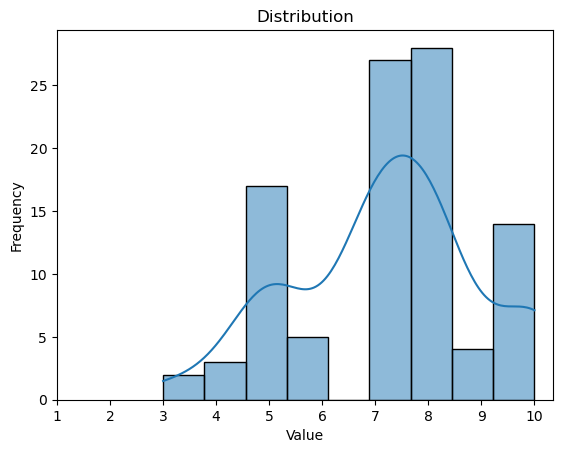

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate a random dataset with a normal distribution
# data = np.random.normal(loc=0, scale=1, size=1000)  # loc is the mean, scale is the standard deviation

# Use seaborn to create a histogram and a kernel density estimate (KDE) plot
sns.histplot(gene_scores, kde=True)

# Adding titles and labels for clarity
plt.title('Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 11, 1))

# Show the plot
plt.show()
